<a href="https://colab.research.google.com/github/ShounakDas101/multibody/blob/main/IEEE_Cognition_Real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random as rnd



```
# This is a note to be added
```

## Pure Oscillator and other Ocillators

In [50]:
def physical_osc(x,t):
    if   x[0] > 0.5*np.pi:
        x[0]=0.5*np.pi - x[0] # oscillate between -pi/2 to +pi/2
    elif x[0]< -0.5*np.pi:
        x[0]=x[0] - 0.5*np.pi # oscillate between -pi/2 to +pi/2
    #return  [x[1], -a*np.sin(x[0]) ]
    #return  [x[1], - f*a*N*np.sin(N*x[0]) ]
    #return  [x[1], -a*np.sin(x[0]) - f*a*N*np.sin(N*x[0]) ]
    #return  [x[1], -a*np.sin(x[0])  - f*a*N*np.sin(N*x[0]) - b*x[1] ]
    return  [x[1], -a*np.sin(x[0]) - f*a*N*np.sin(N*x[0]) - b*x[1]+ c*np.sin(x[0])]

In [51]:
def coupled_osc(x, t):
    if   x[0] > 0.5*np.pi:
        x[0]=0.5*np.pi - x[0] # oscillate between -pi/2 to +pi/2
    elif x[0]< -0.5*np.pi:
        x[0]=x[0] - 0.5*np.pi # oscillate between -pi/2 to +pi/2

    return  [x[1],  -a*np.sin(x[0]) -b*x[1] - f*a*N*np.sin(N*x[0])   ]

In [52]:

def flip_osc(x, t):
    if   x[0] > 0.5*np.pi:
        x[0]=0.5*np.pi - x[0] # oscillate between -pi/2 to +pi/2
    elif x[0]< -0.5*np.pi:
        x[0]=x[0] - 0.5*np.pi # oscillate between -pi/2 to +pi/2
    return  [x[1], -a*np.sin(x[0]) -b*x[1] - f*a*N*np.sin(N*x[0]) + c*np.sin(x[0])]


## Following code is re-written with while loop
# Logic

    
    flip_elapsed_time = tou_0 // initialize
    while(!number_of_samples)
        calculate E
        calculate tou=tou_0*exp(E/kT)
        if(E/kT<1) system is in strong external energy receiving mode
            while loop till flip_elapsed_time != tou
                odeint(mind_oscillator)
                calculate tou=tou_0*exp(E/kT)
                flip_elapsed_time= flip_elapsed_time + 1
        if(E/kT>1) system is in nominal external energy receiving mode
            while loop till flip_lapsed_time != tou
                odeint(mind_oscillator)
                calculate tou=tou_0*exp(E/kT)
                flip_elapsed_time= flip_elapsed_time + 1






# Implementation

In [53]:
I=1.0
a=4.0
b=0.1
c=4.1
f=0.3  # it should be a fraction
N=18 # No of anaisotropy in the potential well = 1+N/2
k=1.38 # boltzmann constant, actual value is 1.380649E-23 Joules/Kelin
T=1.7    # at T=1.7 tou=5, E/kT > 1
print("kT :", k*T)

kT : 2.3459999999999996


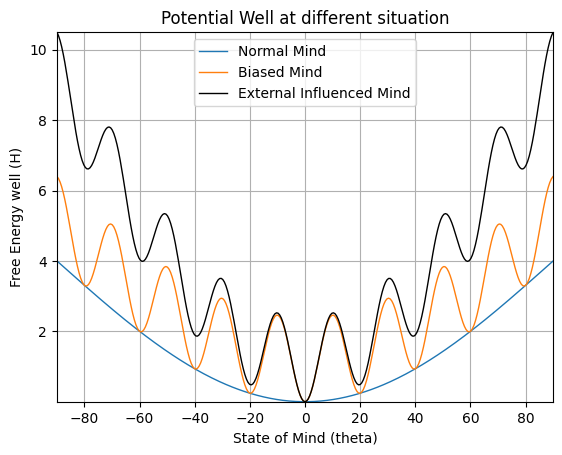

In [54]:
# Mind Potential Equation biased because of  various brands in the market
t = np.arange(-np.pi/2,np.pi/2,0.01)   # start,stop,step
omega=0
# New Potential
H0 = 0.5*I*omega*omega + a*(1-np.cos(t))
H1 = 0.5*I*omega*omega + a*(1-np.cos(t)) + f*a*(1-np.cos(N*t))
H2 = 0.5*I*omega*omega + a*(1-np.cos(t)) + f*a*(1-np.cos(N*t)) + c*(1-np.cos(t))

# A plot of the fluid height (position) inside the straw as a function of time.
plt.title("Potential Well at different situation")
plt.margins(x=0, y=0)
plt.ticklabel_format(style='plain', axis='x')
plt.plot(t*180/np.pi, H0, t*180/np.pi, H1, t*180/np.pi, H2, 'black', linewidth = 1)
plt.xlabel('State of Mind (theta)')
plt.ylabel('Free Energy well (H)')
plt.legend(['Normal Mind', 'Biased Mind', 'External Influenced Mind'])
plt.grid(True)

In [55]:
def find_maxima_minima(series):
    maxima = []
    minima = []
    max_min = []
    for i in range(1, len(series) - 1):
        if series[i] > series[i - 1] and series[i] > series[i + 1]:
            maxima.append((-np.pi/2 + np.pi*i/315 , series[i]))
            max_min.append((-np.pi/2 + np.pi*i/315 , series[i]))
        elif series[i] < series[i - 1] and series[i] < series[i + 1]:
            minima.append((-np.pi/2 + np.pi*i/315, series[i] ))
            max_min.append((-np.pi/2 + np.pi*i/315 , series[i]))
    return maxima, minima, max_min

local_max, local_min, local_max_min = find_maxima_minima(H2)
print("Length of data",len(H2))
print("[angle,energy]")
print(local_max)
print(local_min)
print(local_max_min)
print("Length of data",len(local_max_min))
total_max_min = len(local_max_min)
for xx in range(0,total_max_min,1):
    print("sounak",local_max_min[xx][0])
t_0 =1


Length of data 315
[angle,energy]
[(-1.2416770964188228, 7.805276620985179), (-0.892611246019957, 5.34343113011976), (-0.5335720856096948, 3.504468995736147), (-0.1845062352108291, 2.5244051237632807), (0.17453292519943275, 2.5254753193896606), (0.5335720856096953, 3.502217114489497), (0.8826379360085608, 5.343967283722662), (1.2317037864074267, 7.804185280222964)]
[(-1.3713301265669733, 6.614668320959029), (-1.0322375861795035, 3.9874133919101116), (-0.6831717357806375, 1.863666518222638), (-0.3440791953931679, 0.47911022441535234), (-0.00498665500569806, 0.00012584225067352461), (0.33410588538177177, 0.48039679260552204), (0.6831717357806375, 1.864265678535555), (1.0222642761681073, 3.9868333229807185), (1.3713301265669733, 6.613710447179807)]
[(-1.3713301265669733, 6.614668320959029), (-1.2416770964188228, 7.805276620985179), (-1.0322375861795035, 3.9874133919101116), (-0.892611246019957, 5.34343113011976), (-0.6831717357806375, 1.863666518222638), (-0.5335720856096948, 3.5044689957

In [56]:
def mind_osc(x, t):
    if   x[0] > 0.5*np.pi:
        x[0]=0.5*np.pi - x[0] # oscillate between -pi/2 to +pi/2
    elif x[0]< -0.5*np.pi:
        x[0]=x[0] - 0.5*np.pi # oscillate between -pi/2 to +pi/2
    #return  [x[1], -a*np.sin(x[0]) -b*x[1] - f*a*N*np.sin(N*x[0]) + c*np.sin(x[0])]
    return  [x[1], -a*np.sin(x[0]) +b*x[1] - f*a*N*np.sin(N*x[0]) + c*x[1]]

In [63]:
# Next, we create an array of the desired times for the solution.
# Create an empty NumPy array of zeros
no_of_samples =1300
time_array = np.zeros(no_of_samples)
posi_array = np.zeros(no_of_samples)  # displacement or position
velo_array = np.zeros(no_of_samples)  # velocity
enrg_array = np.ones(no_of_samples)  # energy
theta = np.pi/2 -.001
omega =0
tou_0=5
tou=0
my_time = [0,1e-2] # odeint takes time in terms of array only, h=t1-t0
init_value =[theta, omega] # odeint takes init_value in terms of array only

enrg_array[0]= 0.5*I*omega*omega + a*(1-np.cos(theta))+ f*a*(1-np.cos(N*theta)) + 0.5*c*omega*omega

for m in range(0,total_max_min-1):
    t1,e1 = local_max_min[m]
    t2,e2 = local_max_min[m+1]
    if theta >=t1 :#and theta <= t2
        tou[m]=tou_0*np.exp(abs(local_max_min[m][1]-local_max_min[m+1][1])/(k*T))
        print(theta, t1,t2)

flip_elapsed_time = 50 #int(tou)
print("energy, tau", enrg_array[0], tou)
print("E/kT:",enrg_array[0]/k*T )
i=0
E_high = 0
E_low  = 0
c=0.25
while i != no_of_samples:

    solution = odeint(mind_osc, init_value, my_time)
    posi_array[i]=solution[1,0]
    velo_array[i]=solution[1,1]
    time_array[i]=i
    theta=solution[1,0]
    omega=solution[1,1]
    init_value=[theta, omega]

    enrg_array[i]= 0.5*I*omega*omega + a*(1-np.cos(theta)) + f*a*(1-np.cos(N*theta)) + 0.5*c*omega*omega
    #tou=tou_0*np.exp(enrg_array[i]/(k*T))

    if velo_array[i-1] > velo_array[i - 2] and velo_array[i-1] > velo_array[i] and  abs(velo_array[i-1])<= 0.5:
        E_low = 1 # latch
        #print(c,i,"For E_low ",velo_array[i-2]," ",flip_elapsed_time)

    if velo_array[i-1] > velo_array[i - 2] and velo_array[i-1] > velo_array[i] and abs(velo_array[i-1]) > 0.5:
        E_high  = 1 # latch
        #print(c,i,"For E_high ",velo_array[i-2]," ",flip_elapsed_time)

    if   flip_elapsed_time < tou and E_high==1:
        c=0.25 # normal operation
    elif flip_elapsed_time < tou and E_low ==1:
        c=0.5 # knowledge boost
    elif flip_elapsed_time >= tou:
        flip_elapsed_time=0
        E_high = 0
        E_low  = 0
    #print(c," ",flip_elapsed_time," ",tou)
    flip_elapsed_time = flip_elapsed_time + 1
    i=i+1

print("End of while loop")



TypeError: ignored

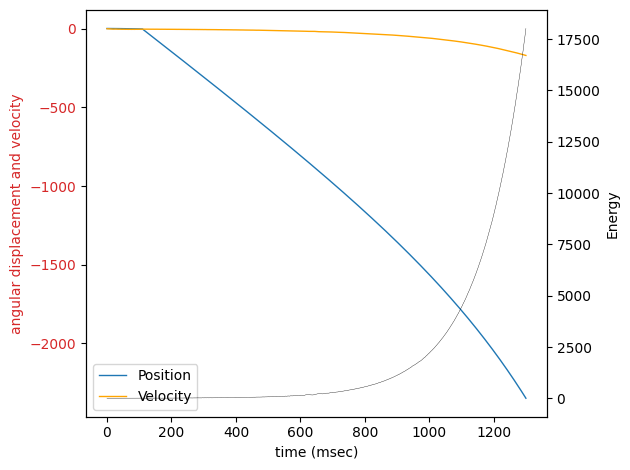

In [58]:
from matplotlib import colors
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (msec)')
ax1.set_ylabel('angular displacement and velocity', color=color)
ax1.plot(time_array[0:], posi_array[0:], time_array[0:], velo_array[0:],  'orange', linewidth = 1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Position', 'Velocity'])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Energy', color='black')  # we already handled the x-label with ax1
ax2.plot(time_array[0:], enrg_array[0:], color='black', linewidth = 0.25)
ax2.tick_params(axis='y', labelcolor='black')
#ax2.legend(['Energy'])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


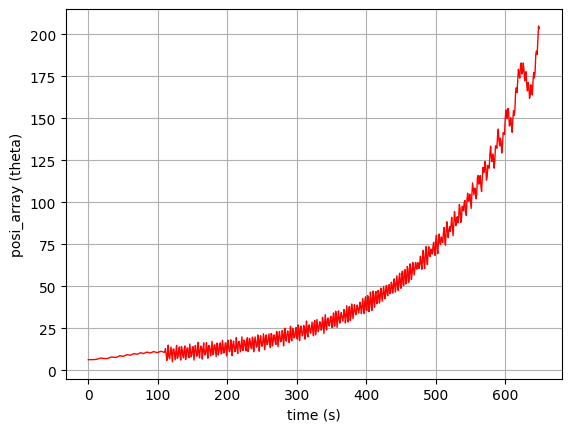

In [59]:
# A plot of the fluid height (position) inside the straw as a function of time.
plt.plot(time_array[0:650], enrg_array[0:650],'red', linewidth = 1)
plt.xlabel('time (s)')
plt.ylabel('posi_array (theta)')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.grid(True)

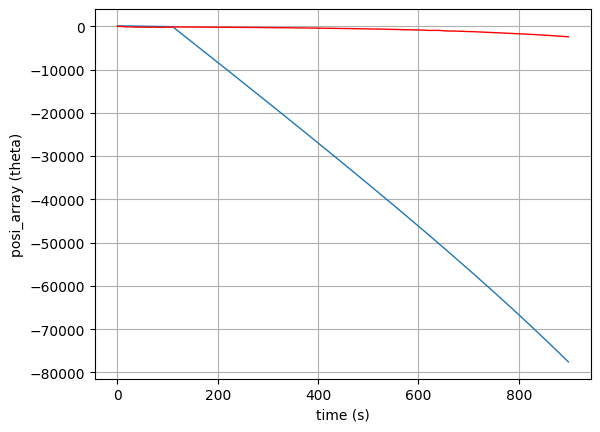

In [60]:
# A plot of the fluid height (position) inside the straw as a function of time.
plt.plot(time_array[0:900], 180*posi_array[0:900]/np.pi,time_array[0:900], 180*velo_array[0:900]/np.pi,'red', linewidth = 1)
plt.xlabel('time (s)')
plt.ylabel('posi_array (theta)')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.grid(True)

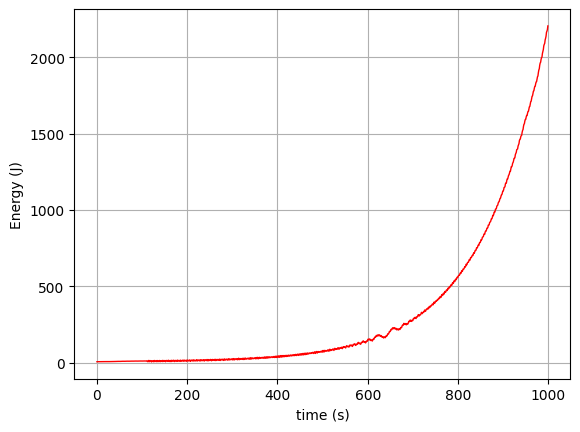

In [61]:
# A plot of the fluid height (position) inside the straw as a function of time.
plt.plot(time_array[0:1000], enrg_array[0:1000],'red', linewidth = 1)
plt.xlabel('time (s)')
plt.ylabel('Energy (J)')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.grid(True)